# Hito 0 - App Reviewer (Cambiemosle el Nombre)

CC5205 - Minería de Datos

- Profesora: Jazmine Maldonado
- Auxiliar: Fran Zautzik

Integrantes:
- Martín Bravo
- Franco González
- Daniel Radrigrán
- Felipe Valdebenito

## 1. Introducción

En la actualidad, las redes sociales constituyen una de las principales formas de comunicación en el mundo. Algunas de estas redes concentran una cantidad tan grande de personas que las usan, que una alternativa a elas suena como algo impensable. Aún así, algunas corporaciones lanzan su perspectiva de como debiese ser alguna red social en cuestion (séase de ejemplo, la existencia de Telegram frente a WhatsApp como aplicaciones de mensajería instantánea). Dichas redes han sido desarrolladas en base a estudios de mercado, análisis de información, y para este caso, se mencionara el feedback otorgado directamente por los usuarios que conforman la plataforma en sí.

Comercialmente hablando, la retroalimentacion de los usuarios sobre una determinada aplicacion es determinante a la hora de realizar mejoras que atraigan y retengan usuarios dentro de la misma plataforma. Tomando esto en cuenta, dada la gran cantidad de comentarios negativos con descripciones vagas o de exagerada negatividad, se complejiza el poder obtener un feedback objetivo que indique precisamente las falencias de la app. Por estas razones, poder extraer determinados fragmentos que se frecuentan en comentarios negativos es de importancia para ayudar a las empresas a mantener la calidad de sus aplicaciones.

Los datos que se usarán en el proyecto a presentar, corresponden a reviews de usuarios de aplicaciones de redes sociales, en particular, la aplicación Threads. El estudio de estos datos puede permitir el observar que aspectos de las aplicaciones valoran los usuarios. Tambien permite entender las razones del porque no gusta determinada caracteristica. La elección de datos se basa en la relevancia que poseen para el desarrollo de nuevas redes sociales o mejoras de las ya existentes.

Es de particular interés el uso de tecnicas de mineria de datos para obtener los aspectos criticados en las reviews de la app a partir del análisis del lenguaje empleado.

Como bien se ha mencionado, estudiar estos datos nos permite entender cuales son los aspectos a mejorar de una app, los cuales no pueden ser conocidos mediante una simple puntuación numérica (e.g. 1-5 estrellas), pues solo indica el nivel de satisfacción que el usuario tiene sobre la app, sin otorgar detalle sobre la razón de dicha calificación.

## 2. Exploración de Datos

 Características más relevantes e interesantes del
dataset (estadísticas de resumen, gráficos, etc.).

Por medio del uso de Python, junto con variadas librerias para la manipulación del dataset escogido, se procedera a la obtención de tablas y gráficos para extraer información general sobre los comentarios dados a la aplicación Threads. Dicha aplicación se basa en la publicación de mensajes breves a modo de que cada usuario participa en "foros" según los tópicos más importantes del día.

In [80]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import string # string manipulation
import re # regular expressions
import nltk # text manipulation

from tqdm import trange # progress bar
from nltk import tokenize # text manipulation
from nltk.corpus import stopwords # text manipulation
from nltk.stem import WordNetLemmatizer # text manipulation
from nltk.probability import FreqDist # text manipulation
from collections import Counter # text manipulation
from sklearn.feature_extraction.text import CountVectorizer # text manipulation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # wordcloud generator
from IPython.display import display # image display

A continuación se presenta una vista preliminar del dataset escogido.

In [81]:
data = pd.read_csv("threads.csv") # carga del dataset a usar como variable
data.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


Dicho dataset cuenta con 4 columnas, y 32910 filas. Las columnas son:
- Source: La procedencia de los comentarios (según el sistema operativo y la tienda de aplicaciones de la cual se descargó),
- Review Description: El comentario publicado, el cual contiene el detalle sobre la calificación otorgada a la aplicación.
- Rating: La puntuación otorgada, en una escala de 1 a 5, con 1 como puntuacion mala y 5 como excelente.
- Review Date: Fecha de publicación de la reseña, con detalle sobre el día, mes, año y hora de publicación.

Se hará una revisión a la cantidad de reseñas segun la calificación otorgada:

In [83]:
data["rating"].value_counts() # contar la cantidad de reviews recibidas segun el rating de 1 a 5

5    15559
1     9726
4     3244
3     2585
2     1796
Name: rating, dtype: int64

A partir de estos datos, se puede generar un gráfico de pastel. Primero, se realizará una conversión del rating según rangos. Dichos rangos son: 1-2 estrellas como NEGATIVO, 3 estrellas como NEUTRAL y 4-5 estrellas como POSITIVO. El gráfico generado se muestra a continuación.

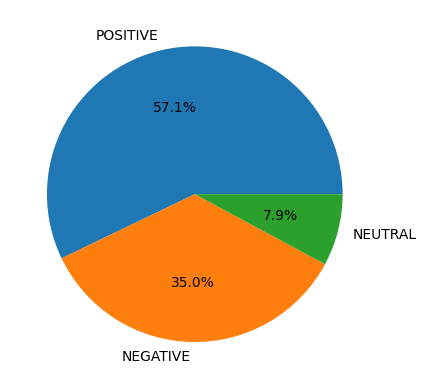

In [84]:
pieGraph = Image.open('img_generadas/graf_torta_reviews_rating.png', 'r')
display(pieGraph)

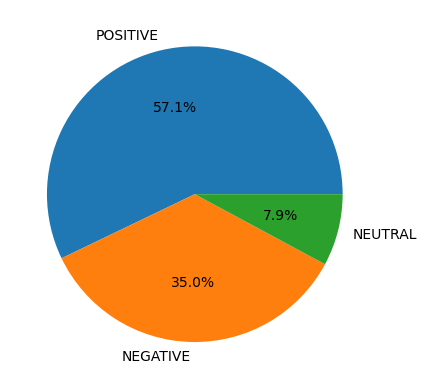

In [85]:
# función para convertir el rating a palabras
def ratingTransform(rating):
    if rating <= 2:
        return "NEGATIVE"
    elif rating == 3:
        return "NEUTRAL"
    else:
        return "POSITIVE"

# creacion del grafico de pie de las reviews segun rating
data["rating"] = data["rating"].apply(ratingTransform)
plt.pie(data["rating"].value_counts(), labels=data["rating"].value_counts().index, autopct='%1.1f%%')
plt.show() 

In [86]:
# revision del largo en caracteres de la primera review en el dataset
lenght = len(data['review_description'][0]) 
print(f'Length of a sample review: {lenght}')

# tabla generada con el largo en caracteres de las reviews escritas
data['Length'] = data['review_description'].str.len()
data.head(10)

Length of a sample review: 465


,source,review_description,rating,review_date,Length
0,Google Play,Meh. Not the greatest experience on a Chromebo...,NEGATIVE,2023-07-08 14:18:24,465
1,Google Play,Pretty good for a first launch!! Its easy to u...,NEUTRAL,2023-07-19 20:52:48,475
2,Google Play,"For a brand new app, it's very well optimized....",NEUTRAL,2023-07-06 23:03:11,497
3,Google Play,"Great app with a lot of potential! However, th...",NEUTRAL,2023-07-10 00:53:25,487
4,Google Play,"The app is good, but it needs a lot of functio...",NEUTRAL,2023-07-06 16:57:43,426
5,Google Play,"Currently, it's very challenging to use. It's ...",NEGATIVE,2023-07-18 22:30:10,386
6,Google Play,I still don’t want to see content from people ...,NEGATIVE,2023-07-19 19:35:31,438
7,Google Play,Could be great if all pages loaded when you cl...,NEGATIVE,2023-07-06 14:35:15,365
8,Google Play,I'm liking the concept! There is room for impr...,NEUTRAL,2023-07-09 03:27:39,416
9,Google Play,Not bad! This is its first launch. There is st...,POSITIVE,2023-07-06 23:41:13,328


In [87]:
# numero de palabras en la primera revie del dataset
word_count = data['review_description'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

# funcion para separar una oracion y contar la cantidad de palabras que posee
def word_count(review):
    review_list = review.split()
    return len(review_list)

# generacion de nueva columna de cantidad de palabras por review
data['Word_count'] = data['review_description'].apply(word_count)
data.head(10)

Word count in a sample review: 85


,source,review_description,rating,review_date,Length,Word_count
0,Google Play,Meh. Not the greatest experience on a Chromebo...,NEGATIVE,2023-07-08 14:18:24,465,85
1,Google Play,Pretty good for a first launch!! Its easy to u...,NEUTRAL,2023-07-19 20:52:48,475,81
2,Google Play,"For a brand new app, it's very well optimized....",NEUTRAL,2023-07-06 23:03:11,497,91
3,Google Play,"Great app with a lot of potential! However, th...",NEUTRAL,2023-07-10 00:53:25,487,94
4,Google Play,"The app is good, but it needs a lot of functio...",NEUTRAL,2023-07-06 16:57:43,426,79
5,Google Play,"Currently, it's very challenging to use. It's ...",NEGATIVE,2023-07-18 22:30:10,386,75
6,Google Play,I still don’t want to see content from people ...,NEGATIVE,2023-07-19 19:35:31,438,81
7,Google Play,Could be great if all pages loaded when you cl...,NEGATIVE,2023-07-06 14:35:15,365,67
8,Google Play,I'm liking the concept! There is room for impr...,NEUTRAL,2023-07-09 03:27:39,416,86
9,Google Play,Not bad! This is its first launch. There is st...,POSITIVE,2023-07-06 23:41:13,328,55


In [88]:
# largo promedio de las palabras en cada review
data['mean_word_length'] = data['review_description'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
data.head(10)

,source,review_description,rating,review_date,Length,Word_count,mean_word_length
0,Google Play,Meh. Not the greatest experience on a Chromebo...,NEGATIVE,2023-07-08 14:18:24,465,85,4.482353
1,Google Play,Pretty good for a first launch!! Its easy to u...,NEUTRAL,2023-07-19 20:52:48,475,81,4.876543
2,Google Play,"For a brand new app, it's very well optimized....",NEUTRAL,2023-07-06 23:03:11,497,91,4.472527
3,Google Play,"Great app with a lot of potential! However, th...",NEUTRAL,2023-07-10 00:53:25,487,94,4.191489
4,Google Play,"The app is good, but it needs a lot of functio...",NEUTRAL,2023-07-06 16:57:43,426,79,4.405063
5,Google Play,"Currently, it's very challenging to use. It's ...",NEGATIVE,2023-07-18 22:30:10,386,75,4.160000
6,Google Play,I still don’t want to see content from people ...,NEGATIVE,2023-07-19 19:35:31,438,81,4.419753
7,Google Play,Could be great if all pages loaded when you cl...,NEGATIVE,2023-07-06 14:35:15,365,67,4.462687
8,Google Play,I'm liking the concept! There is room for impr...,NEUTRAL,2023-07-09 03:27:39,416,86,3.848837
9,Google Play,Not bad! This is its first launch. There is st...,POSITIVE,2023-07-06 23:41:13,328,55,4.981818


In [89]:

np.mean([len(sent) for sent in tokenize.sent_tokenize(data['review_description'][0])])
data['mean_sent_length'] = data['review_description'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
data.head(10)

,source,review_description,rating,review_date,Length,Word_count,mean_word_length,mean_sent_length
0,Google Play,Meh. Not the greatest experience on a Chromebo...,NEGATIVE,2023-07-08 14:18:24,465,85,4.482353,65.571429
1,Google Play,Pretty good for a first launch!! Its easy to u...,NEUTRAL,2023-07-19 20:52:48,475,81,4.876543,157.666667
2,Google Play,"For a brand new app, it's very well optimized....",NEUTRAL,2023-07-06 23:03:11,497,91,4.472527,70.142857
3,Google Play,"Great app with a lot of potential! However, th...",NEUTRAL,2023-07-10 00:53:25,487,94,4.191489,80.333333
4,Google Play,"The app is good, but it needs a lot of functio...",NEUTRAL,2023-07-06 16:57:43,426,79,4.405063,84.400000
5,Google Play,"Currently, it's very challenging to use. It's ...",NEGATIVE,2023-07-18 22:30:10,386,75,4.160000,47.375000
6,Google Play,I still don’t want to see content from people ...,NEGATIVE,2023-07-19 19:35:31,438,81,4.419753,86.800000
7,Google Play,Could be great if all pages loaded when you cl...,NEGATIVE,2023-07-06 14:35:15,365,67,4.462687,60.000000
8,Google Play,I'm liking the concept! There is room for impr...,NEUTRAL,2023-07-09 03:27:39,416,86,3.848837,40.700000
9,Google Play,Not bad! This is its first launch. There is st...,POSITIVE,2023-07-06 23:41:13,328,55,4.981818,46.000000


In [90]:
# tipos de los atributos en el dataset
data.dtypes

source                 object
review_description     object
rating                 object
review_date            object
Length                  int64
Word_count              int64
mean_word_length      float64
mean_sent_length      float64
dtype: object

['Length', 'Word_count', 'mean_word_length', 'mean_sent_length']



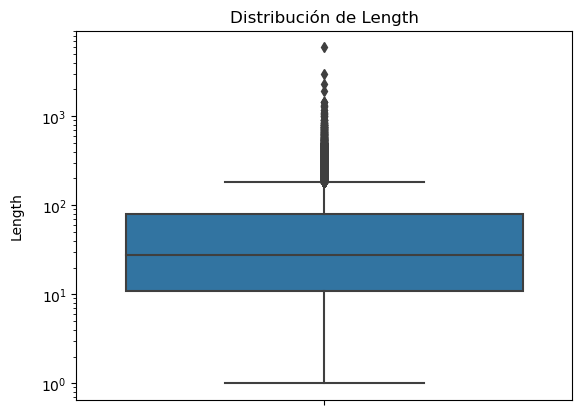

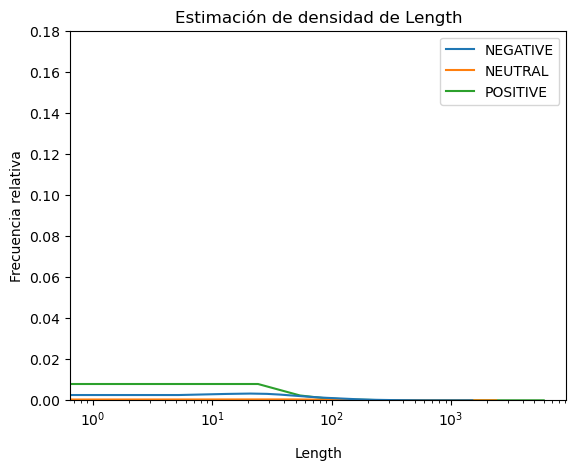

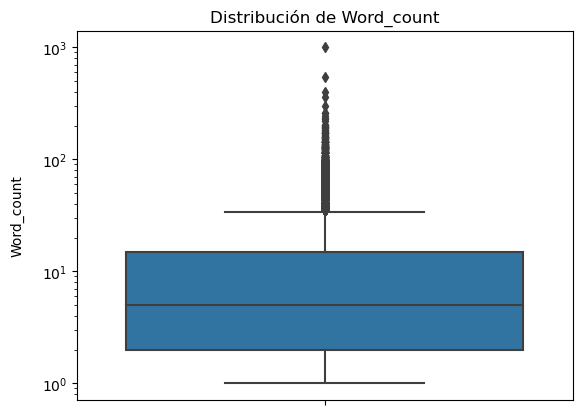

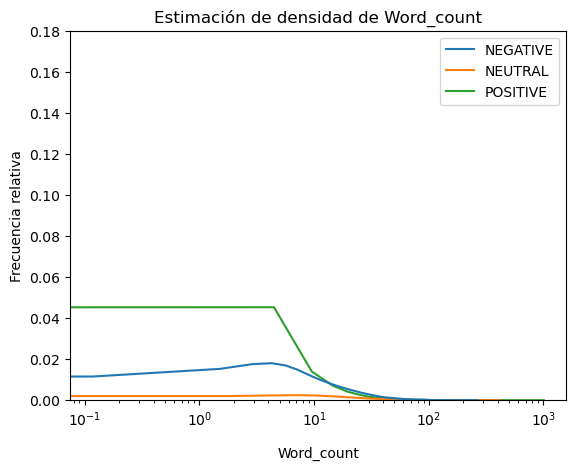

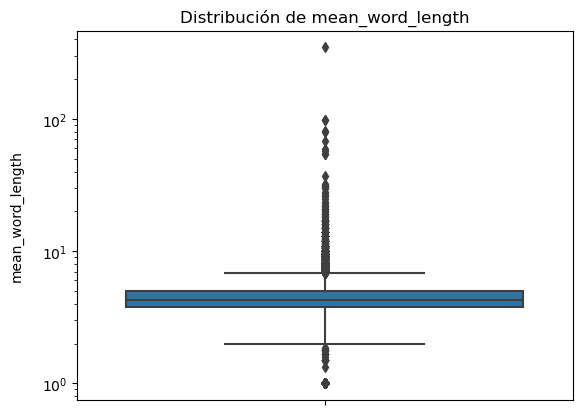

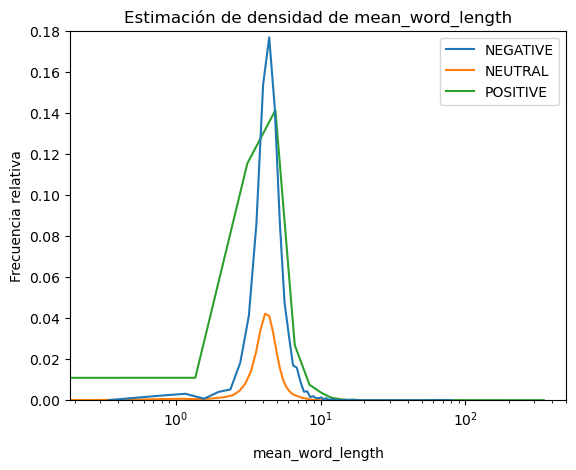

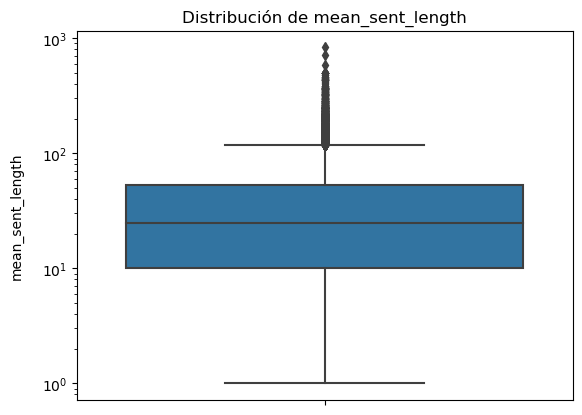

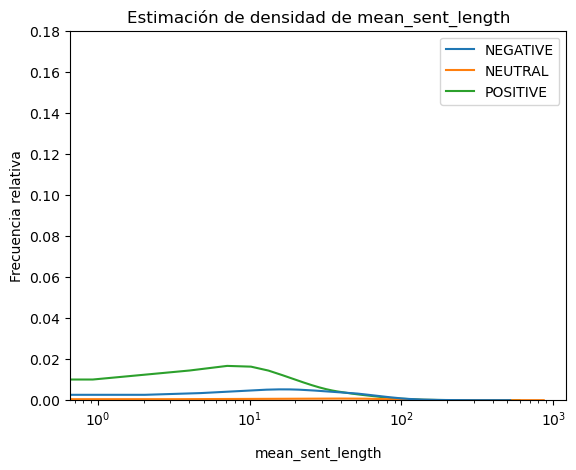

In [91]:
# creacion del boxplot de las palabras
def visualize(col):
    
    print()
    plt.plot(1,2,1)
    sns.boxplot(y=data[col], hue=data['rating'])
    plt.title('Distribución de '+col)
    plt.ylabel(col, labelpad=12.5)
    plt.yscale('log') #
    plt.show()
    
    plt.plot(1,2,2)
    sns.kdeplot(data=data, x=col, hue='rating')
    plt.legend(data['rating'].unique())
    plt.ylim([0,0.18])
    plt.title('Estimación de densidad de '+col)
    plt.xlabel(col, labelpad=12.5)
    plt.ylabel('Frecuencia relativa')
    plt.xscale('log') #
    
    
    plt.show()

features = data.columns.tolist()[4:]
print(features)
for feature in features:
    visualize(feature)

Wordcloud generado de lo anterior

In [92]:
# generacion de la wordcloud para definir cuales pueden ser las palabras mas importantes
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

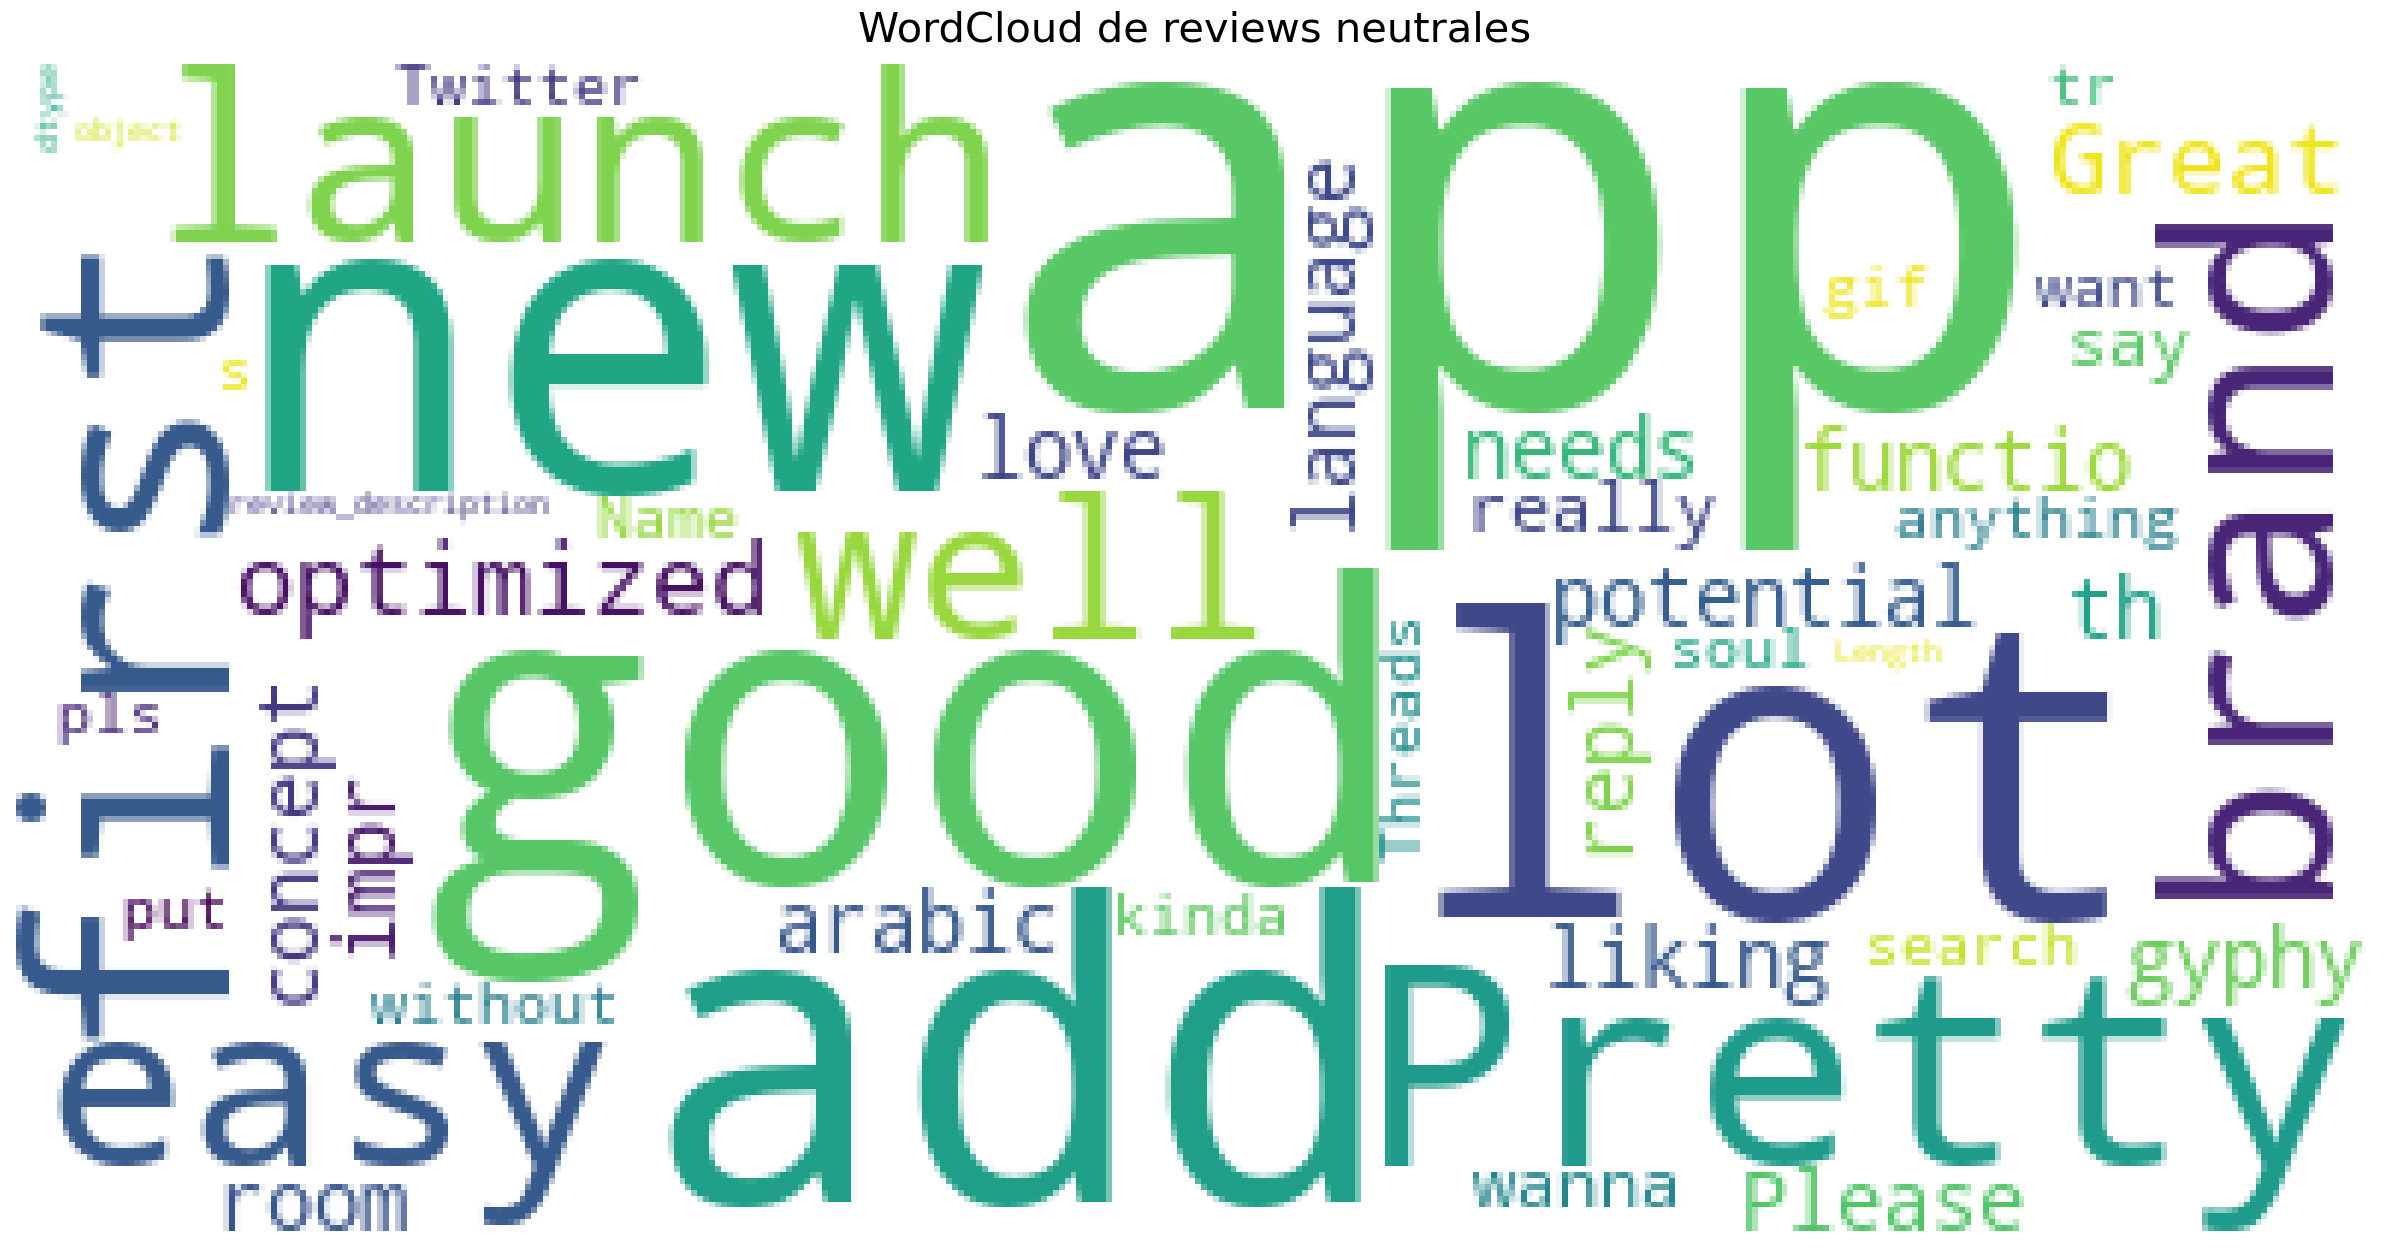

In [93]:
from PIL import Image
Neutral_rev = data[data["rating"] == "NEUTRAL"]
plot_wordcloud(Neutral_rev.review_description,color='white',max_font_size=100,title_size=30,title="WordCloud de reviews neutrales")

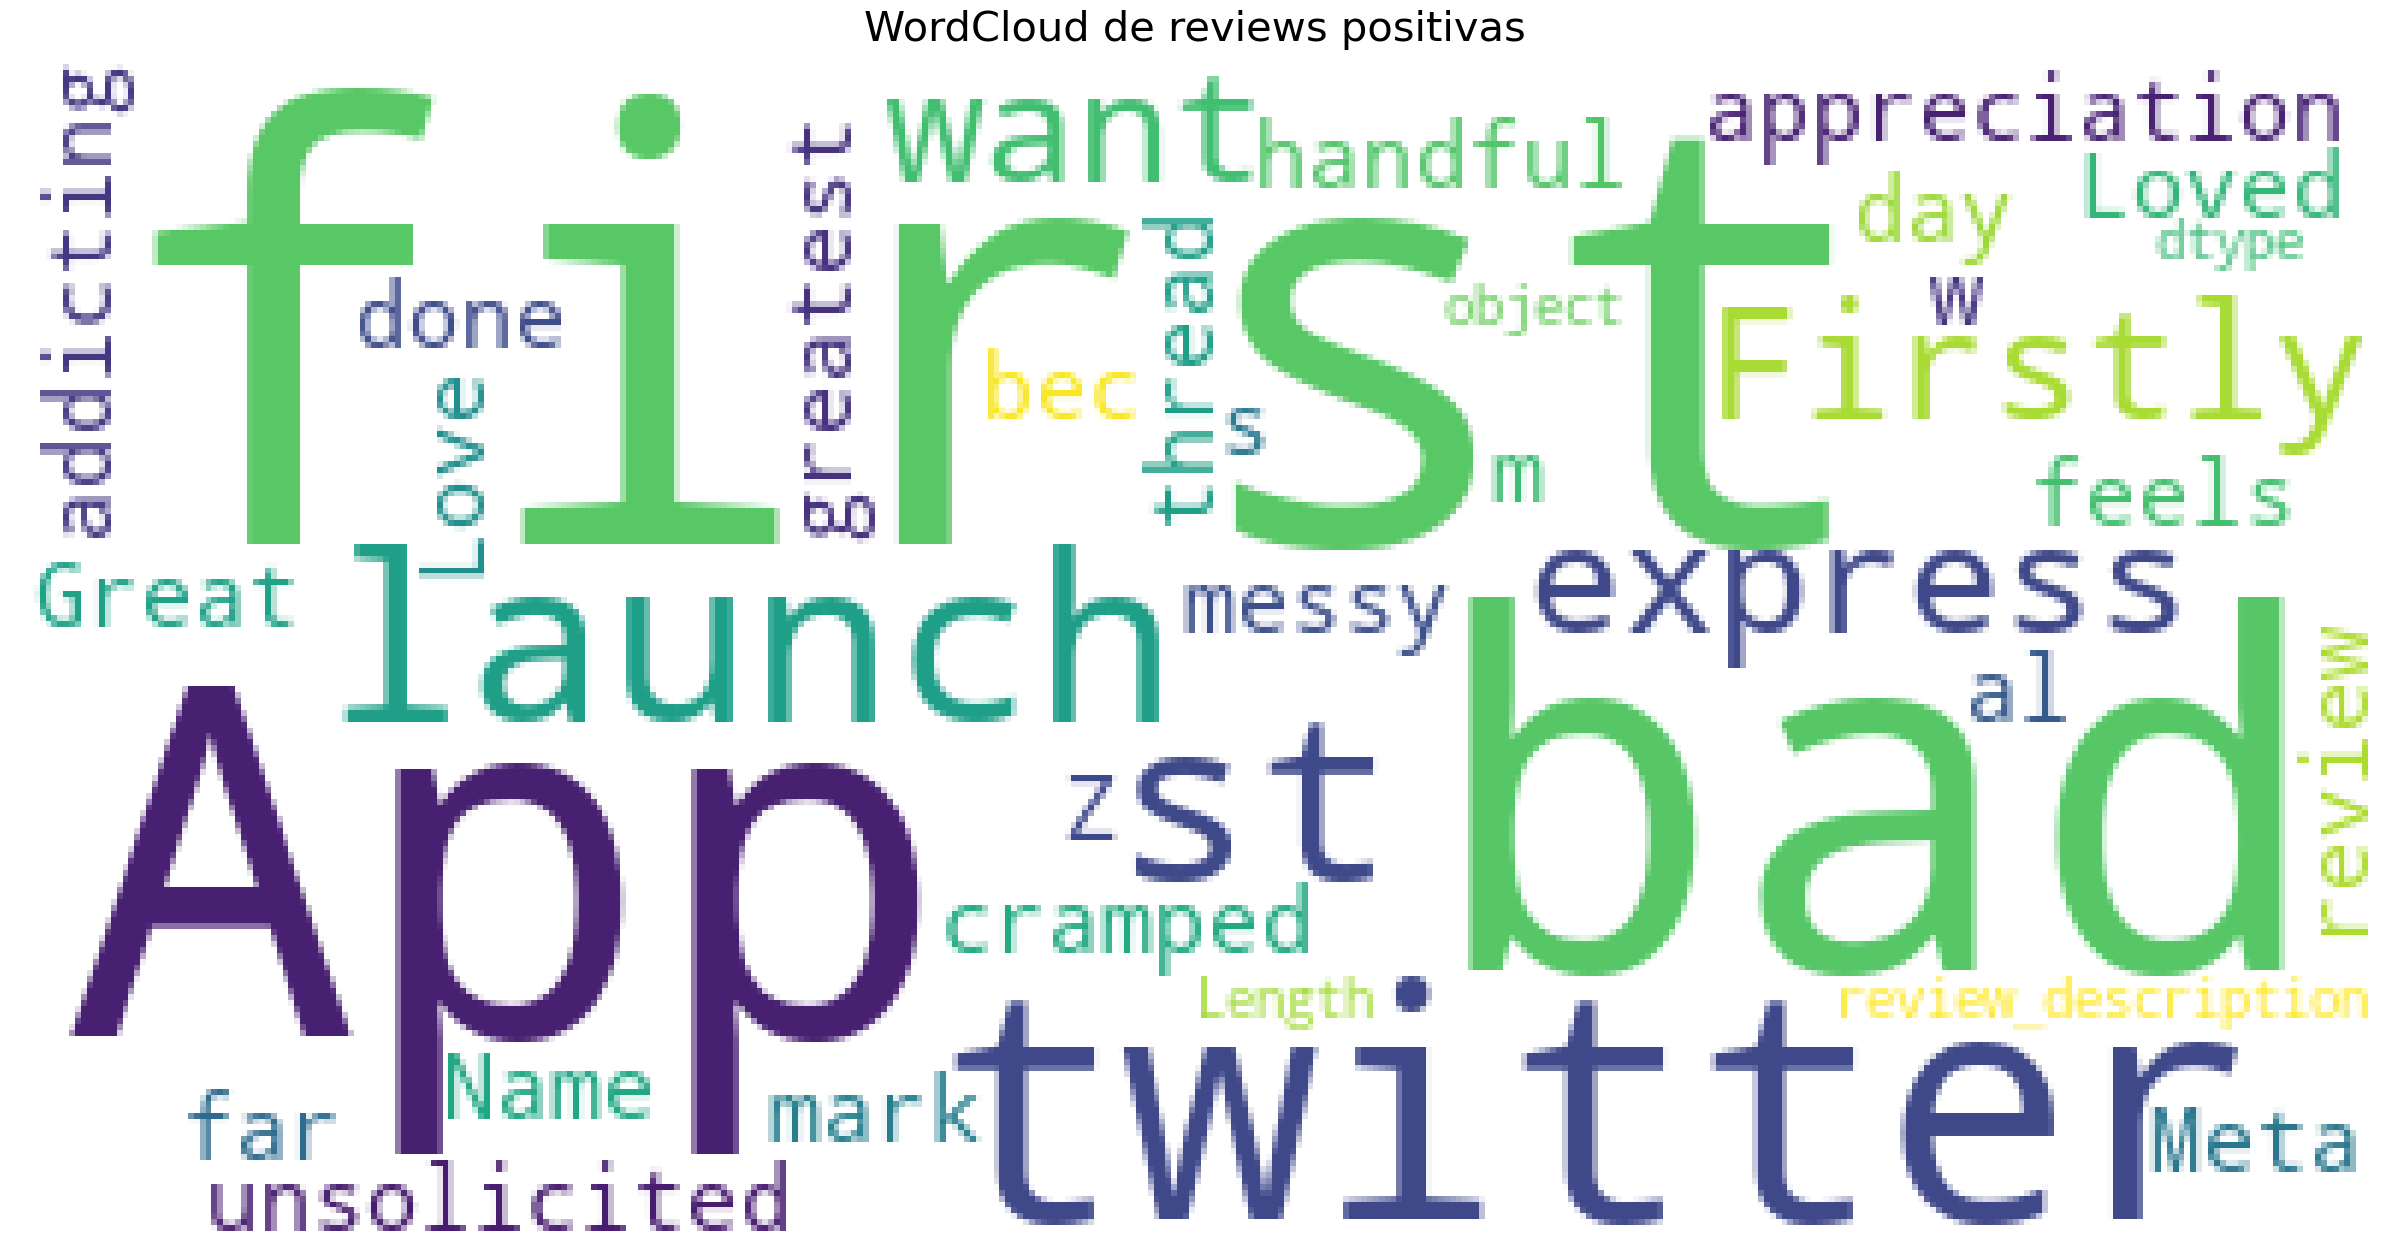

In [94]:
from PIL import Image
Neutral_rev = data[data["rating"] == "POSITIVE"]
plot_wordcloud(Neutral_rev.review_description,color='white',max_font_size=100,title_size=30,title="WordCloud de reviews positivas")

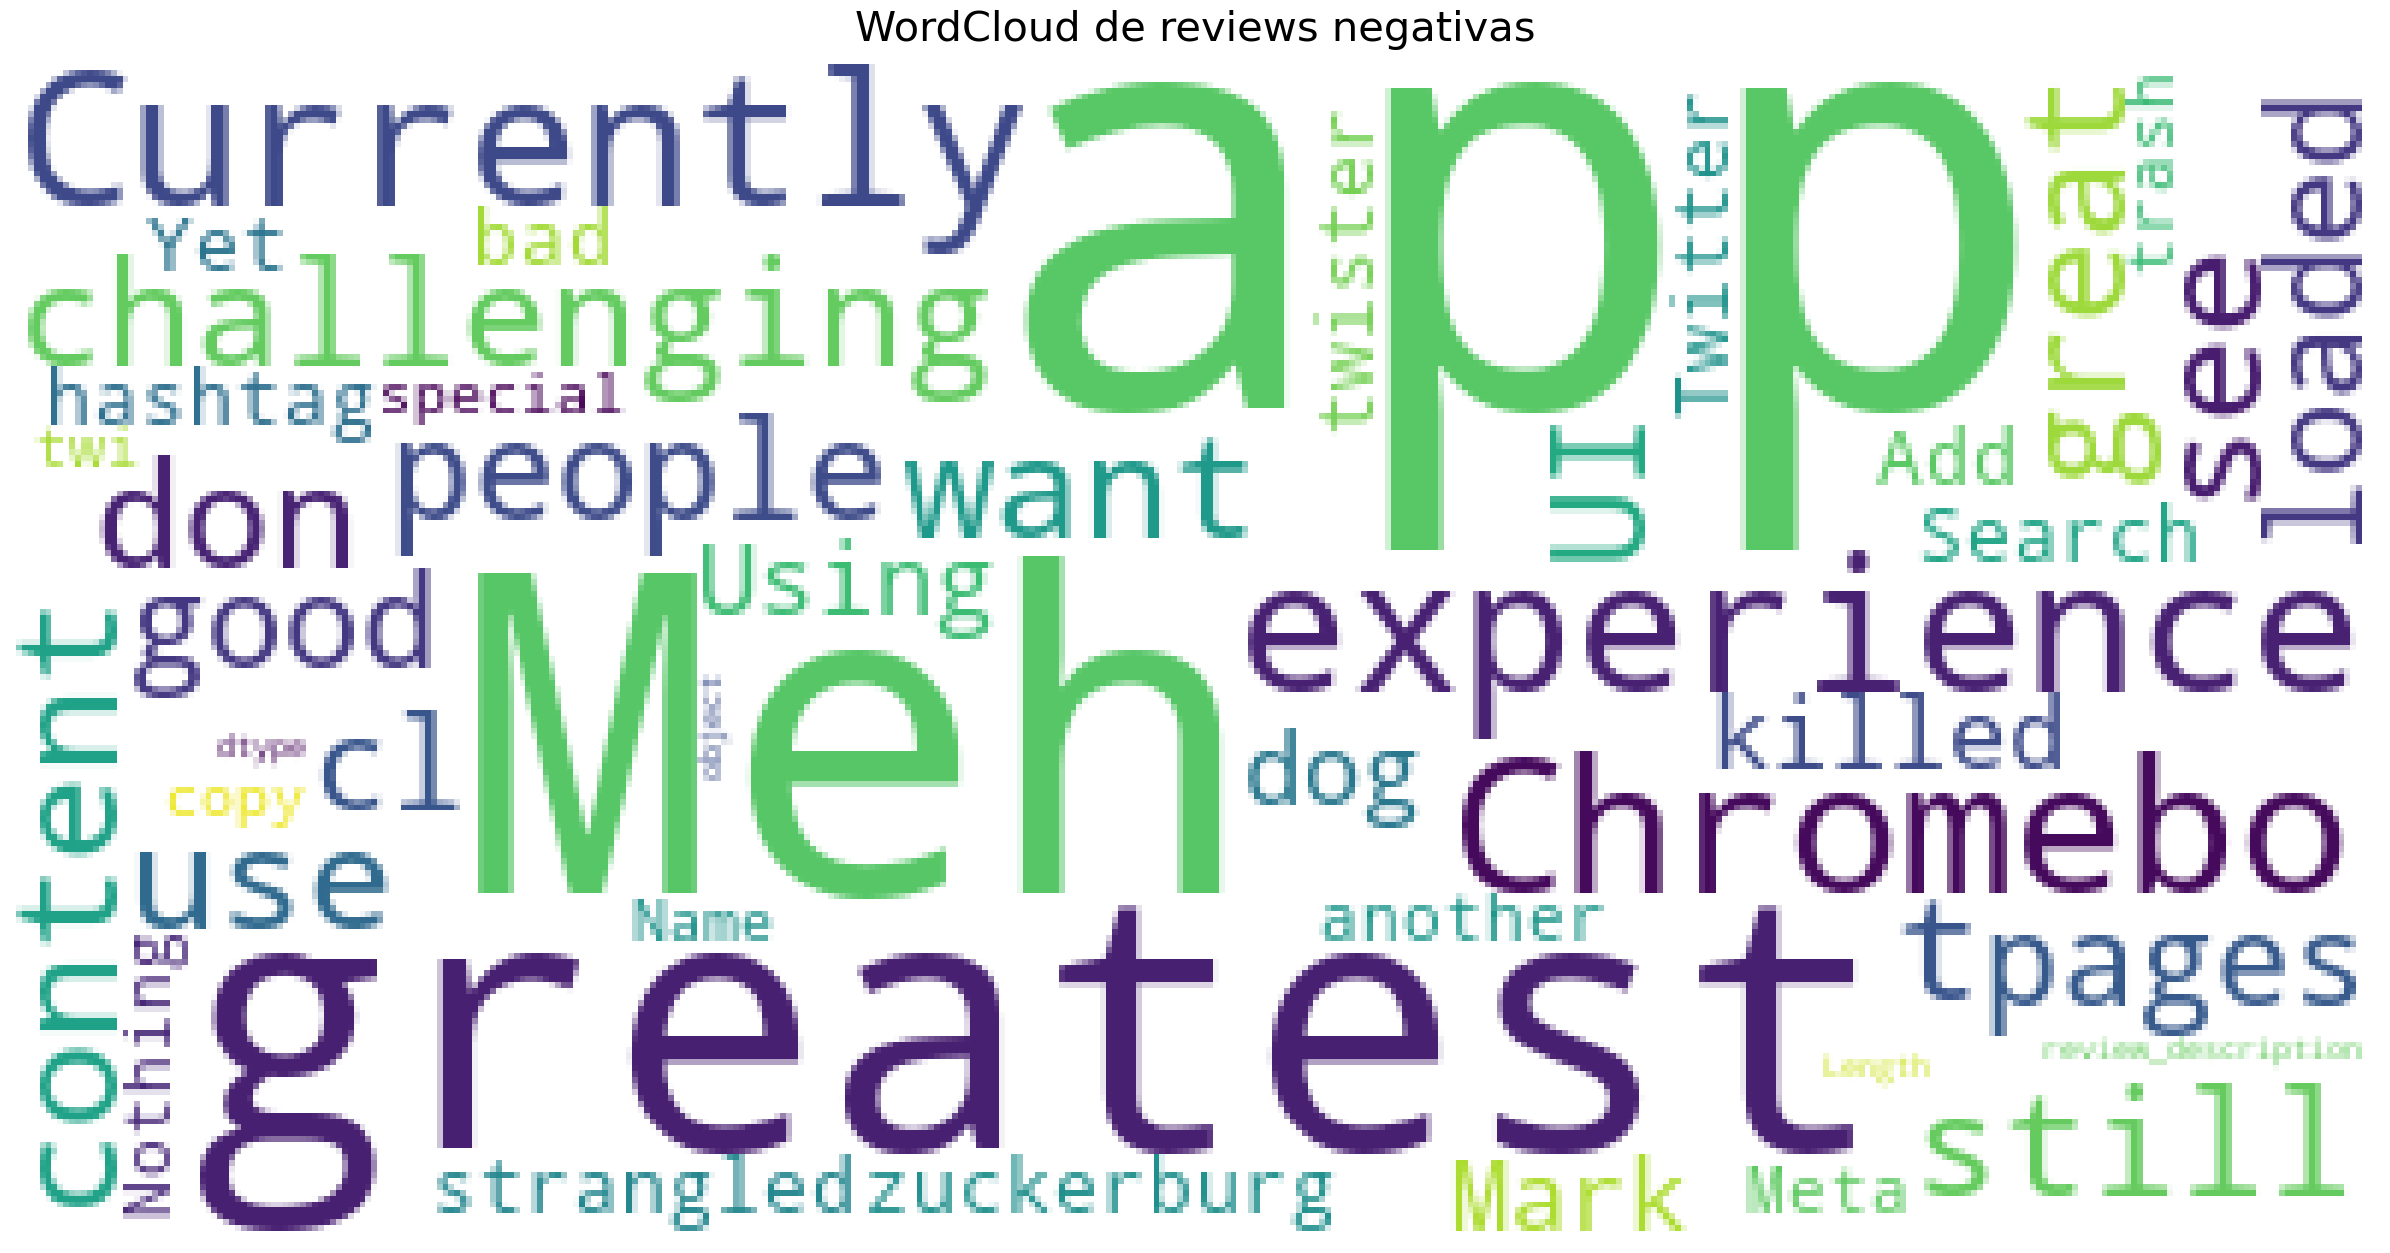

In [95]:
from PIL import Image
Neutral_rev = data[data["rating"] == "NEGATIVE"]
plot_wordcloud(Neutral_rev.review_description,color='white',max_font_size=100,title_size=30,title="WordCloud de reviews negativas")

### Analisis de frecuencia de términos

aca usamos nltk para poner en minuscula, remover puntuaciones y stopwords,  de acuerdo al dialecto del inglés (la librería nos permite hacer todo esto)

In [96]:
def clean(review):
    
    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    
    return review

data['review_description'] = data['review_description'].apply(clean)

In [97]:
# asi queda
data['review_description'][0]


'meh greatest experience chromebook seems customized phones opens little screen cant expand resize - reasons complete mystery judging fact every app know resizeable seems like conscious choice developers youd something like beyond understanding suggests control freak approach great way make first impression'

pasamos las reviews a una lista de strings

In [98]:
def corpus(text):
    text_list = text.split()
    return text_list

data['review_lists'] = data['review_description'].apply(corpus)
data.head(10)

,source,review_description,rating,review_date,Length,Word_count,mean_word_length,mean_sent_length,review_lists
0,Google Play,meh greatest experience chromebook seems custo...,NEGATIVE,2023-07-08 14:18:24,465,85,4.482353,65.571429,"[meh, greatest, experience, chromebook, seems,..."
1,Google Play,pretty good first launch easy use self-explana...,NEUTRAL,2023-07-19 20:52:48,475,81,4.876543,157.666667,"[pretty, good, first, launch, easy, use, self-..."
2,Google Play,brand new app well optimized however missing q...,NEUTRAL,2023-07-06 23:03:11,497,91,4.472527,70.142857,"[brand, new, app, well, optimized, however, mi..."
3,Google Play,great app lot potential however lot needs fixe...,NEUTRAL,2023-07-10 00:53:25,487,94,4.191489,80.333333,"[great, app, lot, potential, however, lot, nee..."
4,Google Play,app good needs lot functionality example searc...,NEUTRAL,2023-07-06 16:57:43,426,79,4.405063,84.400000,"[app, good, needs, lot, functionality, example..."
5,Google Play,currently challenging use dark mode want chang...,NEGATIVE,2023-07-18 22:30:10,386,75,4.160000,47.375000,"[currently, challenging, use, dark, mode, want..."
6,Google Play,still dont want see content people dont specif...,NEGATIVE,2023-07-19 19:35:31,438,81,4.419753,86.800000,"[still, dont, want, see, content, people, dont..."
7,Google Play,could great pages loaded clicked sometimes don...,NEGATIVE,2023-07-06 14:35:15,365,67,4.462687,60.000000,"[could, great, pages, loaded, clicked, sometim..."
8,Google Play,im liking concept room improvement though ever...,NEUTRAL,2023-07-09 03:27:39,416,86,3.848837,40.700000,"[im, liking, concept, room, improvement, thoug..."
9,Google Play,bad first launch still room improvements would...,POSITIVE,2023-07-06 23:41:13,328,55,4.981818,46.000000,"[bad, first, launch, still, room, improvements..."


In [99]:
corpus = []
for i in trange(data.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += data['review_lists'][i]
len(corpus)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 32910/32910 [00:00<00:00, 211866.05it/s]


227522

10 palabras mas comunes

In [100]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('app', 10817),
 ('twitter', 5659),
 ('good', 4379),
 ('instagram', 3191),
 ('like', 3075),
 ('threads', 2966),
 ('nice', 2264),
 ('dont', 1945),
 ('account', 1895),
 ('better', 1770)]

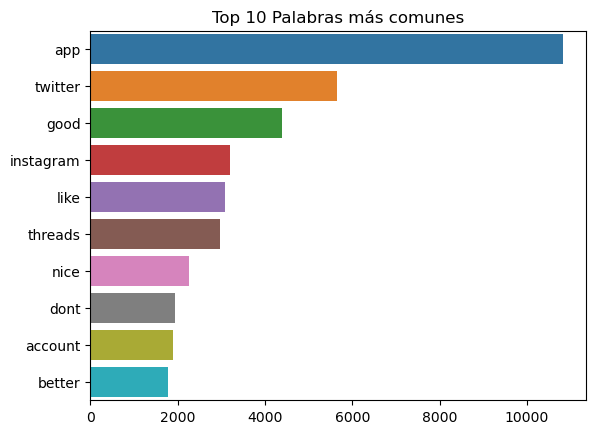

In [101]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

sns.barplot(x=freq, y=words)
plt.title('Top 10 Palabras más comunes')
plt.show()

### Los $N-$ gramas mas frecuentes

Los $N-$ gramas son secuencias de $N$ palabras consecutivas en un texto.

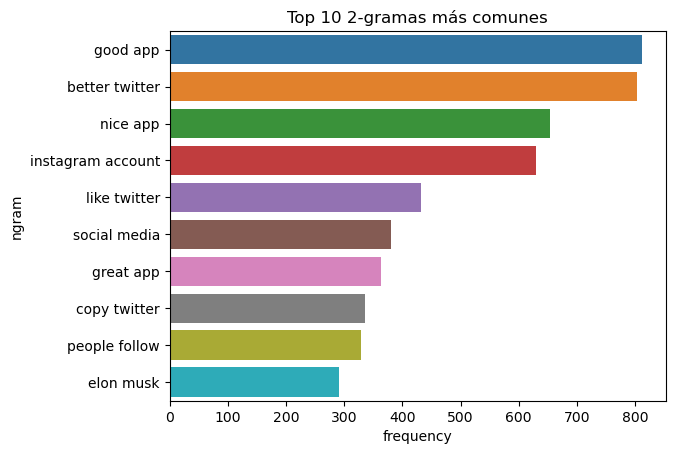

In [102]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(data['review_description'])

count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 2-gramas más comunes')
plt.show()

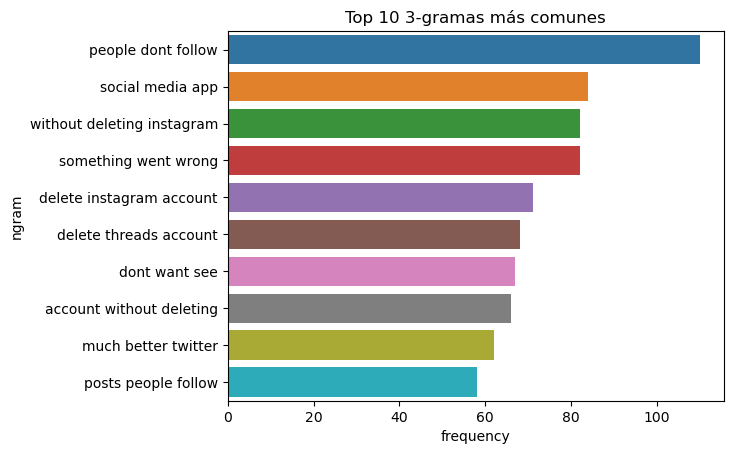

In [103]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(data['review_description'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 3-gramas más comunes')
plt.show()

## 3. Preguntas y Problemas

Dada la exploración anterior y su motivación original,
formular preguntas que se pueden responder mediante la minería de datos y que
se puedan vincular a la problemática planteada en la motivación.

Ejemplos:
1. ¿Es posible predecir la variable X en función de Y, Z, K?
2. ¿Existen grupos importantes de ejemplos que se comporten de
manera similar de acuerdo a algún criterio?
3. ¿Existen asociaciones frecuentes inesperadas entre grupos de
atributos?

1. ¿Existe una asociacion entre las personas que comparan threads con twiter y una puntuacion negativa?\n",
2. ¿Es posible predecir si una reseña es positiva dado ciertos N-gramas?"
3. ¿Que palabras se asocian a una reseña positiva?
4. ¿Cuales palabras se asocian a una reseña negativa?
5. ¿Hay diferencias entre las reseñas positivas y negativas en palabras usadas, tamnaño de las reseñas, etc.?